The purpose of this notebook is to perform exploratory analysis on the Sipakmed database to ascertain the characteristic properties of cell nuclei and cytoplasm for subsequent segmentation. We will also attempt a random forest classifier on the available features to ascertain feature importance. This will guide subsequent segmentation attempts. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats

#### Sipakmed dataset

In [274]:
sipakmed_df = pd.DataFrame()
df2 = pd.read_table('../data/Sipakmed_existing_database/DYSKERATOTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'd'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/DYSKERATOTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'd'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/KOILOCYTOTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'k'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/KOILOCYTOTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'k'
df2[30] = 0
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/PARABASAL_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'p'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/PARABASAL_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'p'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/SUP_INT_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 's'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/SUP_INT_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 's'
df2[30] = 1
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/METAPLASTIC_CYTOPLASM_FEAT.dat',sep=',',header=None)
df2[28] = 'cyto'
df2[29] = 'm'
df2[30] = 2
sipakmed_df = pd.concat([sipakmed_df,df2])
df2 = pd.read_table('../data/Sipakmed_existing_database/METAPLASTIC_NUCLEI_FEAT.dat',sep=',',header=None)
df2[28] = 'nuc'
df2[29] = 'm'
df2[30] = 2
sipakmed_df = pd.concat([sipakmed_df,df2])

In [282]:
headers = ['cluster_id','image_id','area','major_axis_length','minor_axis_length','eccentricity','orientation','equivalent_diameter','solidity','extent','meanI_R','meanC_R','smooth_R','moment-3-R','uniformity-R','entropy-R','meanI_G','meanC_G','smooth_G','moment-3-G','uniformity-G','entropy-G','meanI_B','meanC_B','smooth_B','moment-3-B','uniformity-B','entropy-B','Nucleus/Cytoplasm','Class','Normal']

In [290]:
for i in range(len(sipakmed_df.keys())):
    sipakmed_df.rename(columns={i:headers[i]},inplace=True)

In [296]:
sipakmed_df.head()

,cluster_id,image_id,area,major_axis_length,minor_axis_length,eccentricity,orientation,equivalent_diameter,solidity,extent,...,entropy-G,meanI_B,meanC_B,smooth_B,moment-3-B,uniformity-B,entropy-B,Nucleus/Cytoplasm,Class,Normal
0,1,1,4750.0,109.910,79.173,0.69364,50.2970,77.768,0.79511,0.59316,...,5.8254,79.206,13.228,0.002684,0.050683,0.030804,5.4763,cyto,d,0
1,1,2,2661.0,90.862,67.625,0.66789,-77.8560,58.207,0.67435,0.50541,...,6.0336,77.502,17.711,0.004801,0.085103,0.020582,5.9474,cyto,d,0
2,1,3,3182.0,88.133,78.647,0.45131,39.7120,63.651,0.70507,0.45679,...,6.2933,77.000,16.356,0.004097,0.078425,0.025669,5.7358,cyto,d,0
3,1,4,3403.0,84.923,70.439,0.55860,-7.4439,65.824,0.80908,0.60768,...,5.9339,94.428,14.511,0.003228,0.011435,0.020493,5.8557,cyto,d,0
4,1,5,3060.0,87.223,60.017,0.72562,-18.2240,62.419,0.82680,0.62705,...,6.3872,88.476,17.858,0.004880,0.035157,0.016838,6.0507,cyto,d,0


In [295]:
sipakmed_df.to_csv('../data/Sipakmed_existing_database.csv')

In [2]:
sipakmed_df = pd.read_csv('../data/Sipakmed_existing_database.csv')

In [3]:
df_reduced = sipakmed_df[sipakmed_df['Class']!='m']
df = df_reduced[df_reduced['Nucleus/Cytoplasm']=='nuc']
# df[31] = df_reduced[df_reduced[28]=='nuc'][2]/df_reduced[df_reduced[28]=='cyto'][2] # add a column that has the N/C area ratio

In [322]:
sipakmed_df.keys()

Index(['cluster_id', 'image_id', 'area', 'major_axis_length',
       'minor_axis_length', 'eccentricity', 'orientation',
       'equivalent_diameter', 'solidity', 'extent', 'meanI_R', 'meanC_R',
       'smooth_R', 'moment-3-R', 'uniformity-R', 'entropy-R', 'meanI_G',
       'meanC_G', 'smooth_G', 'moment-3-G', 'uniformity-G', 'entropy-G',
       'meanI_B', 'meanC_B', 'smooth_B', 'moment-3-B', 'uniformity-B',
       'entropy-B', 'Nucleus/Cytoplasm', 'Class', 'Normal'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
# X = df.drop(['cluster_id','image_id','Nucleus/Cytoplasm','Class','Normal'],axis=1)
# ,'uniformity-R','uniformity-G','uniformity-B','smooth_R','smooth_B','smooth_G','moment-3-B','moment-3-R','moment-3-G','entropy-R','entropy-B','entropy-G','equivalent_diameter'

X = df[['area','eccentricity','solidity','meanI_R','meanI_G','meanI_B']]
y = df['Normal']
clusters = df[['cluster_id','Class']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)

In [5]:
X_train = pd.concat([X[df['Class']=='{}'.format(clusters.Class.unique()[i])][df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id.values < np.round(np.percentile(df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id,70))] for i in range(clusters.Class.nunique())])
y_train = pd.concat([y[df['Class']=='{}'.format(clusters.Class.unique()[i])][df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id.values < np.round(np.percentile(df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id,70))] for i in range(clusters.Class.nunique())])
X_test = pd.concat([X[df['Class']=='{}'.format(clusters.Class.unique()[i])][df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id.values >= np.round(np.percentile(df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id,70))] for i in range(clusters.Class.nunique())])
y_test = pd.concat([y[df['Class']=='{}'.format(clusters.Class.unique()[i])][df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id.values >= np.round(np.percentile(df[df['Class']=='{}'.format(clusters.Class.unique()[i])].cluster_id,70))] for i in range(clusters.Class.nunique())])


In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [435]:
# get some initial stats
predictions = clf.predict(X_test)
print(f'Classification report: \n{classification_report(y_test,predictions)}')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test,predictions)}')
print()
# precision recall curve - better than the ROC for unbalanced data
precision, recall, thresholds = precision_recall_curve(y_test,predictions)
print(f'Area under the precision-recall curve: \n{auc(recall,precision)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       495
           1       0.71      0.91      0.80       488

    accuracy                           0.77       983
   macro avg       0.79      0.77      0.77       983
weighted avg       0.79      0.77      0.77       983


Confusion matrix: 
[[318 177]
 [ 46 442]]

Area under the precision-recall curve: 
0.8332940780632709


In [436]:
important_features_dict = {}
for x,i in enumerate(clf.feature_importances_):
    important_features_dict[list(X_train.keys())[x]]=i

sorted_features = sorted(important_features_dict.items(), key=lambda kv: kv[1], reverse=True)
from collections import OrderedDict
OrderedDict(sorted_features)

OrderedDict([('meanI_G', 0.22656474028573054),
             ('meanI_B', 0.14751987085272378),
             ('extent', 0.10391811267664516),
             ('solidity', 0.09499861570005949),
             ('uniformity-B', 0.06414725466102195),
             ('entropy-B', 0.057945213150355064),
             ('smooth_B', 0.04066059843536865),
             ('uniformity-G', 0.039147004768997753),
             ('smooth_R', 0.03380032708578311),
             ('smooth_G', 0.03359101267263789),
             ('meanC_G', 0.033452700824767485),
             ('meanC_R', 0.027481785200050665),
             ('meanC_B', 0.025632741421654504),
             ('entropy-G', 0.021735754911490886),
             ('entropy-R', 0.009597117830843214),
             ('area', 0.008454847741476326),
             ('major_axis_length', 0.007578905571650012),
             ('moment-3-B', 0.006980837672378178),
             ('minor_axis_length', 0.0047781932101249374),
             ('uniformity-R', 0.004504229799179839),
   

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, auc, f1_score


In [8]:
logmodel = LogisticRegression(random_state=42,max_iter=500)
logmodel.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix
preds = logmodel.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       495
           1       0.78      0.89      0.83       488

    accuracy                           0.82       983
   macro avg       0.83      0.82      0.82       983
weighted avg       0.83      0.82      0.82       983



In [430]:
# get some initial stats
predictions = logmodel.predict(X_test)
print(f'Classification report: \n{classification_report(y_test,predictions)}')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test,predictions)}')
print()
# precision recall curve - better than the ROC for unbalanced data
precision, recall, thresholds = precision_recall_curve(y_test,predictions)
print(f'Area under the precision-recall curve: \n{auc(recall,precision)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       495
           1       0.78      0.89      0.83       488

    accuracy                           0.82       983
   macro avg       0.83      0.82      0.82       983
weighted avg       0.83      0.82      0.82       983


Confusion matrix: 
[[373 122]
 [ 55 433]]

Area under the precision-recall curve: 
0.8617132160177455


In [428]:
filename = '../models/Sipakmed_nuc_model'
pickle.dump(logmodel,open(filename,'wb'))

In [402]:
important_features_dict = {}
for x,i in enumerate(clf.feature_importances_):
    important_features_dict[list(X_train.keys())[x]]=i

sorted_features = sorted(important_features_dict.items(), key=lambda kv: kv[1], reverse=True)
from collections import OrderedDict
OrderedDict(sorted_features)

OrderedDict([('meanI_G', 0.33626798235781047),
             ('extent', 0.23072571909921527),
             ('meanI_B', 0.2205839213450933),
             ('solidity', 0.14886842245407317),
             ('meanI_R', 0.032403395090891754),
             ('area', 0.023381906001350955),
             ('eccentricity', 0.007768653651565126)])

For the Sipakmed dataset, the performance is better (without fine tuning) when we include information about the cytoplasm. Also, in the EDA, we see that there isn't a clea relationship between nucleus area and normal vs abnormal class - in fact, to the extent that there is a relationship, it is the opposite of what we see in the other dataset. This might be because the sipakmed dataset contains cell images at a much earlier stage of diagnosis. 

The lower limit of nuclei sizes is similar between the two datasets.

362.0
this dataset has an outlier


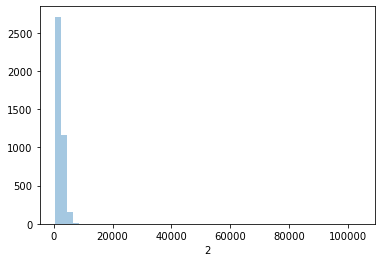

In [182]:
sns.distplot(sipakmed_df[sipakmed_df[28]=='nuc'][2],kde=False)
print(sipakmed_df[sipakmed_df[28]=='nuc'][2].min())
print('this dataset has an outlier')

0.069324


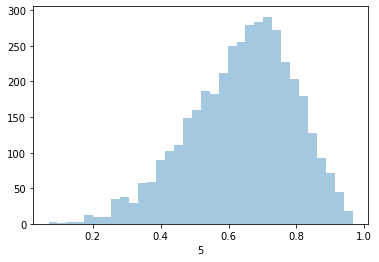

In [195]:
sns.distplot(sipakmed_df[sipakmed_df[28]=='nuc'][5],kde=False)
print(sipakmed_df[sipakmed_df[28]=='nuc'][5].min())

0.65989


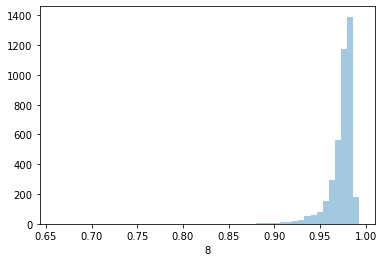

In [202]:
sns.distplot(sipakmed_df[sipakmed_df[28]=='nuc'][8],kde=False)
print(sipakmed_df[sipakmed_df[28]=='nuc'][8].min())

In [206]:
np.sum(sipakmed_df[sipakmed_df[28]=='nuc'][8]<0.9)/4049

0.006915287725364288

In [234]:
sipakmed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,1,4750.0,109.910,79.173,0.69364,50.2970,77.768,0.79511,0.59316,...,5.8254,79.206,13.228,0.002684,0.050683,0.030804,5.4763,cyto,d,0
1,1,2,2661.0,90.862,67.625,0.66789,-77.8560,58.207,0.67435,0.50541,...,6.0336,77.502,17.711,0.004801,0.085103,0.020582,5.9474,cyto,d,0
2,1,3,3182.0,88.133,78.647,0.45131,39.7120,63.651,0.70507,0.45679,...,6.2933,77.000,16.356,0.004097,0.078425,0.025669,5.7358,cyto,d,0
3,1,4,3403.0,84.923,70.439,0.55860,-7.4439,65.824,0.80908,0.60768,...,5.9339,94.428,14.511,0.003228,0.011435,0.020493,5.8557,cyto,d,0
4,1,5,3060.0,87.223,60.017,0.72562,-18.2240,62.419,0.82680,0.62705,...,6.3872,88.476,17.858,0.004880,0.035157,0.016838,6.0507,cyto,d,0


In [268]:
df_reduced = sipakmed_df[sipakmed_df[29]!='m']
nuclei_df = df_reduced[df_reduced[28]=='nuc']

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, auc, f1_score

# X=
# y= 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
logmodel = LogisticRegression(random_state=42,max_iter=500)
logmodel.fit(X_train,y_train)
# get some initial stats
predictions = logmodel.predict(X_test)
print(f'Classification report: \n{classification_report(y_test,predictions)}')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test,predictions)}')
print()
# precision recall curve - better than the ROC for unbalanced data
precision, recall, thresholds = precision_recall_curve(y_test,predictions)
print(f'Area under the precision-recall curve: \n{auc(recall,precision)}')

In [261]:
# carefully curated train and test sets so that slides don't overlap 
df_reduced = sipakmed_df[sipakmed_df[29]!='m']
df = df_reduced[df_reduced[28]=='nuc']
df[df[29]=='d'].groupby(0).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,1,921.0,37.223,31.703,0.52401,77.423,34.244,0.97460,0.75740,...,4.3213,43.604,4.8737,0.000365,0.003940,0.103390,3.7966,nuc,d,0
1,1,2,1215.0,46.680,34.061,0.68380,89.993,39.332,0.96200,0.72321,...,4.8696,47.956,8.1729,0.001026,0.018127,0.059964,4.5002,nuc,d,0
2,1,3,1120.0,46.432,31.102,0.74250,37.552,37.763,0.97731,0.66786,...,4.2847,45.499,4.9807,0.000381,0.002509,0.080842,4.0205,nuc,d,0
3,1,4,734.0,32.807,28.676,0.48579,-69.172,30.571,0.97219,0.67650,...,4.4276,53.165,6.7883,0.000708,0.007260,0.055287,4.5170,nuc,d,0
4,1,5,596.0,33.168,23.261,0.71285,-57.049,27.547,0.96911,0.71207,...,4.6854,48.581,4.7387,0.000345,0.001976,0.087299,3.9480,nuc,d,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,221,5,1164.0,59.290,26.664,0.89317,-65.702,38.497,0.95488,0.55192,...,5.0603,53.537,7.6757,0.000905,0.005651,0.043395,4.7769,nuc,d,0
809,222,1,1726.0,56.649,38.955,0.72603,-40.192,46.879,0.97569,0.69151,...,3.9045,35.223,2.2170,0.000076,0.000148,0.150030,3.0807,nuc,d,0
810,223,1,3053.0,89.271,44.410,0.86748,24.769,62.347,0.97044,0.65797,...,4.5293,62.510,5.0572,0.000393,0.000631,0.056614,4.3370,nuc,d,0
811,223,2,1664.0,51.466,41.659,0.58720,37.424,46.029,0.97998,0.73759,...,4.7256,46.492,3.9131,0.000235,0.000895,0.081452,3.8732,nuc,d,0


In [ ]:
df_reduced = sipakmed_df[sipakmed_df[29]!='m']
df = df_reduced[df_reduced[28]=='nuc']

df1=df[[2,3,4]]
X = df1.rename(columns={2:'Kerne_A',3:'KerneShort',4:'KerneLong'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y)
# logmodel = LogisticRegression(random_state=42,max_iter=500)
# logmodel.fit(X_train,y_train)
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
# get some initial stats
# predictions = logmodel.predict(X_test)
predictions = clf.predict(X_test)
print(f'Classification report: \n{classification_report(y_test,predictions)}')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test,predictions)}')
print()
# precision recall curve - better than the ROC for unbalanced data
precision, recall, thresholds = precision_recall_curve(y_test,predictions)
print(f'Area under the precision-recall curve: \n{auc(recall,precision)}')